In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn import datasets

In [26]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target


x,y = df.iloc[:,0:-1].values, df.iloc[:,-1].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 5)


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
class LDA(object):
    '''
    线性判别分析
    '''
    def __init__(self,data,target,d):
        self.data = data
        self.target =target
        self.d = d
        self.labels = set(target)
        self.mu = self.data.mean(axis = 0)


    def divide(self):
        self.classmu, self.classify = {},{}
        for label in self.labels:
            self.classify[label] = self.data[self.target == label]
            self.classmu[label] = self.classify[label].mean(axis = 0)
    
    def getSt(self):
        self.St = np.dot((self.data - self.mu).T, (self.data - self.mu))

    def getSb(self):
        self.Sb = np.zero((self.data.shape[1], self.data.shape[1]))

        for i in self.labels:
            classi = self.labels[i]
            mui = self.classmu[i]
            self.Sb += len(classi) * (np.dot((mui - self.mu).reshape(-1,1),(mui - self.mu).reshape(1,-1)))


    def getw(self):
        self.divide()
        self.getSt()
        self.getSb()

        self.Sw = self.St - self.Sb
        # 将Sw/Sb求最大值问题转换为广义求解问题
        # 找到特征值和特征函数
        eig_val, eig_vec = np.linalg.eig(np.inv(self.Sw).dot(self.Sb))
        # 一般来说不会取全部，这里取前d
        top =(np.argsort(eig_val)[::-1])[:self.d]
        self.w = eig_vec[:top]
        
    

SyntaxError: expected ':' (1808432169.py, line 19)


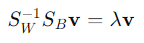